<a href="https://colab.research.google.com/github/Pavel184/NLP_basic_course/blob/Homework_lesson_5/Homework_lesson_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1

**Написать теггер на данных с руским языком**
1. проверить UnigramTagger, BigramTagger, TrigramTagger и их комбмнации
2. написать свой теггер как на занятии, попробовать разные векторайзеры, добавить знание не только букв но и слов
3. сравнить все реализованные методы сделать выводы


## загрузка данных

In [1]:
!pip install pyconll

In [2]:
import pyconll
import nltk
from nltk.corpus import brown
from nltk.tag import DefaultTagger
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger, TrigramTagger
from nltk.tag import RegexpTagger

In [3]:
!mkdir datasets

In [4]:
!wget -O ./datasets/ru_syntagrus-ud-train.conllu https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-b.conllu
!wget -O ./datasets/ru_syntagrus-ud-dev.conllu https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-dev.conllu

--2021-11-15 11:38:44--  https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-b.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42836344 (41M) [text/plain]
Saving to: ‘./datasets/ru_syntagrus-ud-train.conllu’

./datasets/ru_synta 100%[===================>]  40.85M   156MB/s    in 0.3s    

2021-11-15 11:38:45 (156 MB/s) - ‘./datasets/ru_syntagrus-ud-train.conllu’ saved [42836344/42836344]

--2021-11-15 11:38:45--  https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-dev.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserco

In [5]:
full_train = pyconll.load_from_file('datasets/ru_syntagrus-ud-train.conllu')
full_test = pyconll.load_from_file('datasets/ru_syntagrus-ud-dev.conllu')

In [6]:
def data_prep(dataset, testsent = 0):
  data = []
  for sent in dataset[:]:
      if testsent == 1:
          data.append([(token.form) for token in sent])
      else:
          data.append([(token.form, token.upos) for token in sent])
  return data

In [7]:
fdata_train = data_prep(full_train)
fdata_test = data_prep(full_test)
fdata_sent_test = data_prep(full_test, testsent = 1)

In [8]:
all_train_texts = [' '.join(token.form for token in sent) for sent in full_train]
all_test_texts = [' '.join(str(token.form) for token in sent) for sent in full_test]

all_train_labels = [' '.join(token.form for token in sent) for sent in full_train]
all_test_labels = [' '.join(str(token.form) for token in sent) for sent in full_test]

#### UnigramTagger

In [9]:
unigram_tagger = UnigramTagger(fdata_train)
display(unigram_tagger.tag(fdata_sent_test[100]), unigram_tagger.evaluate(fdata_test))

[('Это', 'PRON'),
 ('сочинение', 'NOUN'),
 ('известно', 'ADJ'),
 ('во', 'ADP'),
 ('многих', 'NUM'),
 ('вариантах', 'NOUN'),
 ('(', 'PUNCT'),
 ('самые', 'ADJ'),
 ('ранние', 'ADJ'),
 ('из', 'ADP'),
 ('них', 'PRON'),
 ('почти', 'ADV'),
 ('на', 'ADP'),
 ('сто', 'NUM'),
 ('лет', 'NOUN'),
 ('старше', 'ADJ'),
 (')', 'PUNCT'),
 ('и', 'CCONJ'),
 ('восходит', 'VERB'),
 ('к', 'ADP'),
 ('ещё', 'ADV'),
 ('более', 'ADV'),
 ('древним', None),
 ('рукописям', None),
 ('XVI', 'NUM'),
 ('в', 'ADP'),
 ('.', 'PUNCT')]

0.8320593788658116

#### BigramTagger

In [10]:
bigram_tagger = BigramTagger(fdata_train, backoff=unigram_tagger)
display(bigram_tagger.tag(fdata_sent_test[100]), bigram_tagger.evaluate(fdata_test))

[('Это', 'PRON'),
 ('сочинение', 'NOUN'),
 ('известно', 'ADJ'),
 ('во', 'ADP'),
 ('многих', 'NUM'),
 ('вариантах', 'NOUN'),
 ('(', 'PUNCT'),
 ('самые', 'ADJ'),
 ('ранние', 'ADJ'),
 ('из', 'ADP'),
 ('них', 'PRON'),
 ('почти', 'ADV'),
 ('на', 'ADP'),
 ('сто', 'NUM'),
 ('лет', 'NOUN'),
 ('старше', 'ADJ'),
 (')', 'PUNCT'),
 ('и', 'CCONJ'),
 ('восходит', 'VERB'),
 ('к', 'ADP'),
 ('ещё', 'ADV'),
 ('более', 'ADV'),
 ('древним', None),
 ('рукописям', None),
 ('XVI', 'NUM'),
 ('в', 'ADP'),
 ('.', 'PUNCT')]

0.8379777329253206

#### TrigramTagger

In [11]:
trigram_tagger = TrigramTagger(fdata_train, backoff=bigram_tagger)
display(trigram_tagger.tag(fdata_sent_test[100]), trigram_tagger.evaluate(fdata_test))

[('Это', 'PRON'),
 ('сочинение', 'NOUN'),
 ('известно', 'ADJ'),
 ('во', 'ADP'),
 ('многих', 'NUM'),
 ('вариантах', 'NOUN'),
 ('(', 'PUNCT'),
 ('самые', 'ADJ'),
 ('ранние', 'ADJ'),
 ('из', 'ADP'),
 ('них', 'PRON'),
 ('почти', 'ADV'),
 ('на', 'ADP'),
 ('сто', 'NUM'),
 ('лет', 'NOUN'),
 ('старше', 'ADJ'),
 (')', 'PUNCT'),
 ('и', 'CCONJ'),
 ('восходит', 'VERB'),
 ('к', 'ADP'),
 ('ещё', 'ADV'),
 ('более', 'ADV'),
 ('древним', None),
 ('рукописям', None),
 ('XVI', 'NUM'),
 ('в', 'ADP'),
 ('.', 'PUNCT')]

0.8366885864965167

#### Комбинация тэггеров

In [12]:
def backoff_tagger(train_sents, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sents, backoff=backoff)
    return backoff


backoff = DefaultTagger('NOUN') 
tag = backoff_tagger(fdata_train,  
                     [UnigramTagger, BigramTagger, TrigramTagger],  
                     backoff = backoff) 
  
tag.evaluate(fdata_test) 

0.8845302428543524

#### Самописный теггер на основе ML

In [13]:
train_tok = []
train_label = []
for sent in fdata_train[:]:
    for tok in sent:
        train_tok.append(tok[0] if tok[0] is not None else 'NO_TOK')
        train_label.append('NO_TAG' if tok[1] is None else tok[1])
        
test_tok = []
test_label = []
for sent in fdata_test[:]:
    for tok in sent:
        test_tok.append(tok[0] if tok[0] is not None else 'NO_TOK')
        test_label.append('NO_TAG' if tok[1] is None else tok[1])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
train_enc_labels = le.fit_transform(train_label)

In [16]:
test_enc_labels = le.transform(test_label)

In [17]:
hvectorizer = HashingVectorizer(ngram_range=(1, 5), analyzer='char', n_features=2000)
X_train_h = hvectorizer.fit_transform(train_tok)
X_test_h = hvectorizer.transform(test_tok)

In [18]:
cvectorizer = CountVectorizer(ngram_range=(1, 5), analyzer='char', max_features=2000)
X_train_c = cvectorizer.fit_transform(train_tok)
X_test_c = cvectorizer.transform(test_tok)

In [19]:
tvectorizer = TfidfVectorizer(ngram_range=(1, 5), analyzer='char', max_features=2000)
X_train_t = tvectorizer.fit_transform(train_tok)
X_test_t = tvectorizer.transform(test_tok)

In [20]:
X_train = X_train_h + X_train_c + X_train_t
X_test = X_test_h + X_test_c + X_test_t

In [ ]:
lr = LogisticRegression(random_state=0, max_iter=500)
lr.fit(X_train, train_enc_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = lr.predict(X_test)

In [ ]:
accuracy_score(test_enc_labels, pred)

0.9249234976235432

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train_t, train_enc_labels)

[14:13:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
pred = model.predict(X_test_t)

In [ ]:
accuracy_score(test_enc_labels, pred)

0.07682791848427632

Вывод: все тэггеры показали примерно одинаковый результат в этой задаче, комбинация тэггеров показало ощутимо лучший результат. ML модель, как и ожидалось, показала самый высокий результат.

# Задание 2

**Проверить насколько хорошо работает NER**

1. взять нер из nltk
2. проверить deeppavlov
3. написать свой нер попробовать разные подходы:
* передаём в сетку токен и его соседей
* передаём в сетку только токен

4. сделать выводы по вашим экспериментам какой из подходов успешнее справляется

#### NLTK NER

In [1]:
!wget http://www.labinform.ru/pub/named_entities/collection5.zip
!unzip collection5.zip

--2021-11-15 18:24:21--  http://www.labinform.ru/pub/named_entities/collection5.zip
Resolving www.labinform.ru (www.labinform.ru)... 95.181.230.181
Connecting to www.labinform.ru (www.labinform.ru)|95.181.230.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1899530 (1.8M) [application/zip]
Saving to: ‘collection5.zip’

collection5.zip     100%[===================>]   1.81M   925KB/s    in 2.0s    

2021-11-15 18:24:25 (925 KB/s) - ‘collection5.zip’ saved [1899530/1899530]

Archive:  collection5.zip
   creating: Collection5/
  inflating: Collection5/001.ann     
  inflating: Collection5/001.txt     
  inflating: Collection5/002.ann     
  inflating: Collection5/002.txt     
  inflating: Collection5/003.ann     
  inflating: Collection5/003.txt     
  inflating: Collection5/004.ann     
  inflating: Collection5/004.txt     
  inflating: Collection5/005.ann     
  inflating: Collection5/005.txt     
  inflating: Collection5/006.ann     
  inflating: Collection5

In [2]:
!pip install corus

     |████████████████████████████████| 83 kB 1.3 MB/s 


In [3]:
from corus import load_ne5
import corus

dir = 'Collection5/'
records = load_ne5(dir)

In [7]:
!pip install razdel
from razdel import tokenize

In [25]:
words = []
for ix, rec in enumerate(records):
    for token in tokenize(rec.text):
        words += [token.text]
    words

In [26]:
records

<generator object load_ne5 at 0x7f88131fb850>

In [27]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
{(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(words)) if hasattr(chunk, 'label') }

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


{('Эдриана Коутса', 'PERSON'),
 ('Запира Исаева', 'PERSON'),
 ('Вечному', 'PERSON'),
 ('Очаково-Матвеевское', 'ORGANIZATION'),
 ('Сергей Иванов', 'PERSON'),
 ('До', 'PERSON'),
 ('Western Union', 'GPE'),
 ('Христенко', 'PERSON'),
 ('Мокриджем', 'PERSON'),
 ('Pete Geren', 'PERSON'),
 ('Потому', 'PERSON'),
 ('Mittal', 'ORGANIZATION'),
 ('Альберт Веретенников', 'PERSON'),
 ('Совета Федерации', 'PERSON'),
 ('Джабраилова', 'PERSON'),
 ('Вне', 'PERSON'),
 ('Мохова Александр Игнатенко', 'PERSON'),
 ('Ушаков', 'PERSON'),
 ('Йоргос Папаконстантину', 'PERSON'),
 ('Glencore International AG', 'PERSON'),
 ('Бруней', 'GPE'),
 ('Сергиева Посада', 'ORGANIZATION'),
 ('Бывший', 'PERSON'),
 ('RBS С', 'ORGANIZATION'),
 ('Михаил Лещенко', 'PERSON'),
 ('Ранее И', 'PERSON'),
 ('Бориса Невзорова', 'PERSON'),
 ('Эдуарда Каплуна', 'PERSON'),
 ('Совета Федерации Сергея Миронова', 'PERSON'),
 ('Вадим Ипатов', 'PERSON'),
 ('Мордовии Н', 'ORGANIZATION'),
 ('Азании', 'PERSON'),
 ('Салащенко', 'PERSON'),
 ('Ходили', 

#### Deeppavlov NER

In [28]:
# установка deeppavlov

!pip uninstall -y tensorflow tensorflow-gpu
!pip install numpy scipy librosa unidecode inflect librosa transformers
!pip install deeppavlov

Found existing installation: tensorflow 1.15.5
Uninstalling tensorflow-1.15.5:
  Successfully uninstalled tensorflow-1.15.5


In [29]:
!python -m deeppavlov install squad_bert
!python -m deeppavlov install ner_ontonotes

2021-11-15 11:28:49.19 INFO in 'deeppavlov.core.common.file'['file'] at line 32: Interpreting 'squad_bert' as '/usr/local/lib/python3.7/dist-packages/deeppavlov/configs/squad/squad_bert.json'
  Cloning https://github.com/deepmipt/bert.git (to revision feat/multi_gpu) to /tmp/pip-req-build-ycydnfyb
  Running command git clone -q https://github.com/deepmipt/bert.git /tmp/pip-req-build-ycydnfyb
  Using cached tensorflow-1.15.5-cp37-cp37m-manylinux2010_x86_64.whl (110.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires numpy>=1.18.5, but you have numpy 1.18.0 which is incompatible.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.15.5 which is incompatible.
2021-11-15 11:29:12.372 INFO in 'deeppavlov.core.common.file'['file'] at line 32: Interpreting 'ner_ontonotes' as '/usr/local/lib/python3.7/dist-packages/deeppavlov/config

In [30]:
import deeppavlov
from deeppavlov import configs, build_model

In [31]:
dir = 'Collection5/'
records = load_ne5(dir)
sent = []
for ix, rec in enumerate(records):
    sent += [rec.text]


In [32]:
deeppavlov_ner = build_model(configs.ner.ner_bert_ent_and_type_rus, download=True)
deeppavlov_ner([sent[0]])

/usr/local/lib/python3.7/dist-packages/cryptography/hazmat/backends/openssl/x509.py:18: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
2021-11-15 11:29:39.701 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/bert/multi_cased_L-12_H-768_A-12.zip download because of matching hashes
2021-11-15 11:29:40.898 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/kbqa/datasets/entity_and_type_detection_rus.pickle download because of matching hashes
2021-11-15 11:30:19.982 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/kbqa/models/ner_cq_rus.tar.gz download because of matching hashes
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...

2021-11-15 11:30:22.473 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /root/.deeppavlov/models/ner_ent_and_type_rus/tag.dict]











The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


2021-11-15 11:30:53.827 INFO in 'deeppavlov.core.models.tf_model'['tf_model'] at line 51: [loading model from /root/.deeppavlov/models/ner_ent_and_type_rus/model]



INFO:tensorflow:Restoring parameters from /root/.deeppavlov/models/ner_ent_and_type_rus/model


[[['Светлана',
   'Мухомор',
   'стала',
   'сити',
   '-',
   'менеджером',
   'Калининграда',
   '\r',
   '\n',
   '\r',
   '\n',
   'Депутаты',
   'окружного',
   'совета',
   'Калининграда',
   '(',
   'городская',
   'дума',
   ')',
   'выбрали',
   'сити',
   '-',
   'менеджера',
   '.',
   'Им',
   'стала',
   'Светлана',
   'Мухомор',
   ',',
   'которая',
   'ранее',
   'исполняла',
   'обязанности',
   'главы',
   'администрации',
   ',',
   'сообщает',
   'местное',
   'издание',
   '"',
   'Клопс',
   '.',
   'Ru',
   '"',
   '.',
   'Кандидатуру',
   'Мухомор',
   'поддержали',
   '26',
   'депутатов',
   '.',
   '\r',
   '\n',
   '\r',
   '\n',
   'В',
   'поддержку',
   'ее',
   'конкурента',
   '-',
   'бывшего',
   'депутата',
   'Сергея',
   'Карпушенко',
   '-',
   'проголосовал',
   'один',
   'человек',
   '.',
   'Еще',
   'один',
   'участник',
   'конкурса',
   'на',
   'право',
   'занять',
   'должность',
   'сити',
   '-',
   'менеджера',
   '-',
   'бывший',

#### Самописная NN

In [249]:
records = load_ne5(dir)

In [250]:
words_docs = []
for ix, rec in enumerate(records):
    words = []
    for token in tokenize(rec.text):
        type_ent = 'OUT'
        for ent in rec.spans:
            if (token.start >= ent.start) and (token.stop <= ent.stop):
                type_ent = ent.type
                break
        words.append([token.text, type_ent])
    words_docs.extend(words)

In [251]:
import pandas as pd

In [252]:
df_words = pd.DataFrame(words_docs, columns=['word', 'tag'])

In [253]:
df_words['tag'].value_counts()

OUT         219214
PER          21200
ORG          13651
LOC           4568
GEOPOLIT      4356
MEDIA         2482
Name: tag, dtype: int64

In [254]:
# Удаление пунктуации
import re
p = re.compile(r'[^\w\s]+')
df_words['word'] = [p.sub('', x) for x in df_words['word'].tolist()]
df_words = df_words.drop(np.where(df_words['word'] == '')[0])

In [255]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, GlobalMaxPooling1D, Conv1D, GRU, LSTM, Dropout, Input
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [256]:
from sklearn import model_selection, preprocessing, linear_model

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_words['word'], df_words['tag'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [257]:
train_data = tf.data.Dataset.from_tensor_slices((train_x, train_y))
valid_data = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

train_data = train_data.batch(16)
valid_data = valid_data.batch(16)

In [258]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

In [259]:
'''def custom_standardization(input_data):
    return input_data

vocab_size = 30000
seq_len = 10

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    #ngrams=(1, 3),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)'''

"def custom_standardization(input_data):\n    return input_data\n\nvocab_size = 30000\nseq_len = 10\n\nvectorize_layer = TextVectorization(\n    standardize=custom_standardization,\n    max_tokens=vocab_size,\n    output_mode='int',\n    #ngrams=(1, 3),\n    output_sequence_length=seq_len)\n\n# Make a text-only dataset (no labels) and call adapt to build the vocabulary.\ntext_data = train_data.map(lambda x, y: x)\nvectorize_layer.adapt(text_data)"

In [260]:
def custom_standardization(input_data):
    # удалил пунктуацию на этапе формирования df, не понял как её удалить в tf
    return input_data

vocab_size = 30000
seq_len = 10

vectorize_layer_1 = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    ngrams=(1, 3),
    output_sequence_length=seq_len)

vectorize_layer_2 = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    ngrams=(1, 5),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer_1.adapt(text_data)
vectorize_layer_2.adapt(text_data)

In [261]:
len(vectorize_layer.get_vocabulary())

29871

In [262]:
'''embedding_dim = 64

class modelNER(tf.keras.Model):
    def __init__(self):
        super(modelNER, self).__init__()
        self.emb = Embedding(vocab_size, embedding_dim)
        self.gPool = GlobalMaxPooling1D()
        self.fc1 = Dense(300, activation='relu')
        self.fc2 = Dense(50, activation='relu')
        self.fc3 = Dense(6, activation='softmax')

    def call(self, x):
        x = vectorize_layer(x)
        x = self.emb(x)
        pool_x = self.gPool(x)
        
        fc_x = self.fc1(pool_x)
        fc_x = self.fc2(fc_x)
        
        concat_x = tf.concat([pool_x, fc_x], axis=1)
        prob = self.fc3(concat_x)
        return prob'''

"embedding_dim = 64\n\nclass modelNER(tf.keras.Model):\n    def __init__(self):\n        super(modelNER, self).__init__()\n        self.emb = Embedding(vocab_size, embedding_dim)\n        self.gPool = GlobalMaxPooling1D()\n        self.fc1 = Dense(300, activation='relu')\n        self.fc2 = Dense(50, activation='relu')\n        self.fc3 = Dense(6, activation='softmax')\n\n    def call(self, x):\n        x = vectorize_layer(x)\n        x = self.emb(x)\n        pool_x = self.gPool(x)\n        \n        fc_x = self.fc1(pool_x)\n        fc_x = self.fc2(fc_x)\n        \n        concat_x = tf.concat([pool_x, fc_x], axis=1)\n        prob = self.fc3(concat_x)\n        return prob"

In [263]:
embedding_dim_1 = 64
embedding_dim_2 = 128

class modelNER(tf.keras.Model):
    def __init__(self):
        super(modelNER, self).__init__()
        self.emb_1 = Embedding(vocab_size, embedding_dim_1)
        self.emb_2 = Embedding(vocab_size, embedding_dim_2)
        self.gPool = GlobalMaxPooling1D()
        self.fc1_1 = Dense(300, activation='relu')
        self.fc1_2 = Dense(300, activation='relu')
        self.fc2 = Dense(50, activation='relu')
        self.fc3 = Dense(6, activation='softmax')

    def call(self, x):
        x_1 = vectorize_layer_1(x)
        x_1 = self.emb_1(x_1)
        pool_x_1 = self.gPool(x_1)

        x_2 = vectorize_layer_2(x)
        x_2 = self.emb_2(x_2)
        pool_x_2 = self.gPool(x_2)
        
        fc_x_1 = self.fc1_1(pool_x_1)
        fc_x_2 = self.fc1_2(pool_x_2)
        fc_x = tf.concat([fc_x_1, fc_x_2], axis=1)
        fc_x = self.fc2(fc_x)
        
        concat_x_1 = tf.concat([pool_x_1, pool_x_2, fc_x], axis=1)
        prob = self.fc3(concat_x_1)
        return prob

In [264]:
mmodel = modelNER()

In [265]:
mmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [266]:
hist = mmodel.fit(train_data, validation_data=valid_data, epochs=3)

Epoch 1/3
10386/10386 [==============================] - 683s 66ms/step - loss: 0.2812 - accuracy: 0.9188 - val_loss: 0.1937 - val_accuracy: 0.9434
Epoch 2/3
10386/10386 [==============================] - 684s 66ms/step - loss: 0.0875 - accuracy: 0.9729 - val_loss: 0.2174 - val_accuracy: 0.9445
Epoch 3/3
10386/10386 [==============================] - 684s 66ms/step - loss: 0.0717 - accuracy: 0.9758 - val_loss: 0.2396 - val_accuracy: 0.9441


In [267]:
import plotly.graph_objects as go

In [268]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=hist.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=hist.history['val_loss'],
                    name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

In [269]:
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

In [270]:
y_pred = mmodel.predict(valid_data)
y_pred_class = np.argmax(y_pred,axis=1)

conf_matrix = multilabel_confusion_matrix(valid_y, y_pred_class)

In [271]:
labels = ["".join(str(i)) for i in ['GEOPOLIT - 0','LOC - 1','MEDIA - 2','ORG - 3','OUT - 4','PER - 5']]

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Conf matr for " + class_label)

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

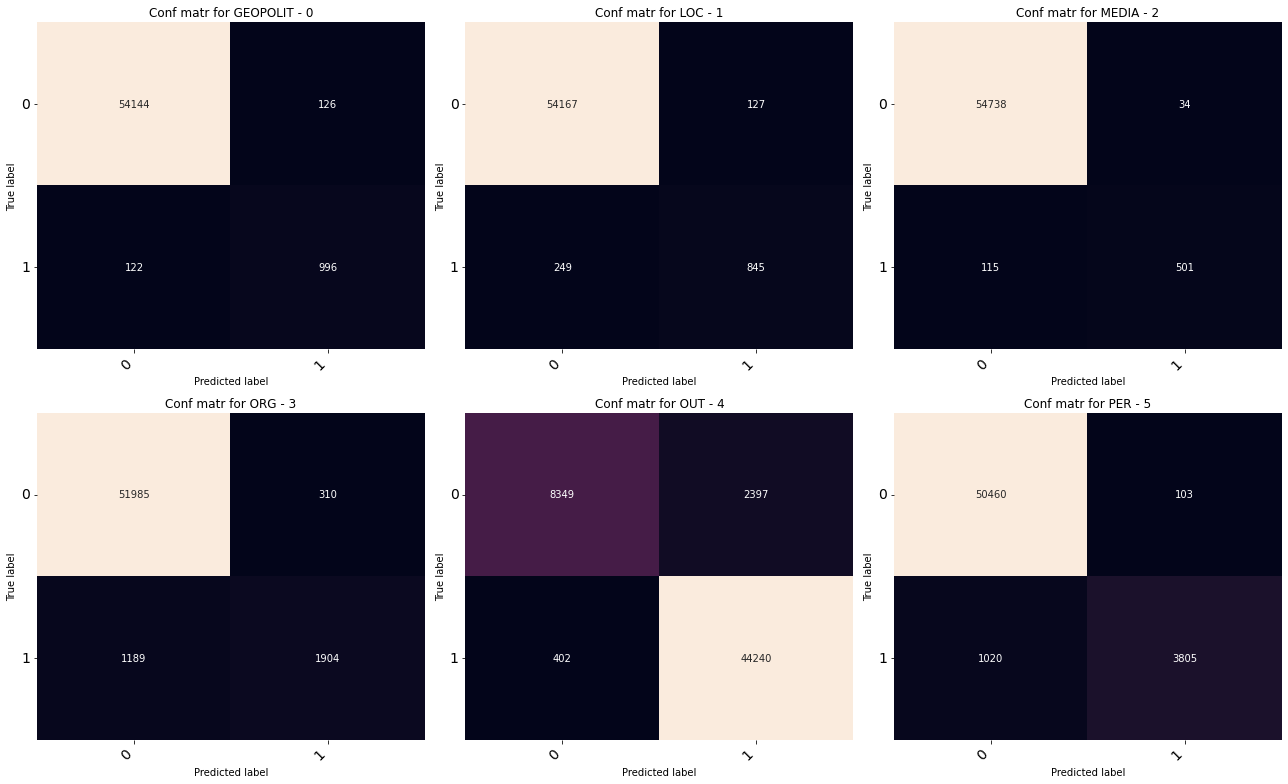

In [273]:
fig, ax = plt.subplots(2, 3, figsize=(18, 11))
    
for axes, cfs_matrix, label in zip(ax.flatten(), conf_matrix, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["0", "1"])
    
fig.tight_layout()
plt.show()

In [274]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

In [275]:
class_names = ['GEOPOLIT - 0','LOC - 1','MEDIA - 2','ORG - 3','OUT - 4','PER - 5']
print(classification_report(valid_y, y_pred_class, target_names=class_names))

              precision    recall  f1-score   support

GEOPOLIT - 0       0.89      0.89      0.89      1118
     LOC - 1       0.87      0.77      0.82      1094
   MEDIA - 2       0.94      0.81      0.87       616
     ORG - 3       0.86      0.62      0.72      3093
     OUT - 4       0.95      0.99      0.97     44642
     PER - 5       0.97      0.79      0.87      4825

    accuracy                           0.94     55388
   macro avg       0.91      0.81      0.86     55388
weighted avg       0.94      0.94      0.94     55388



Вывод: Самописная(tf) NN показала себя лучше, чем nltk. Про deeppavlov сложно сделать вывод, тк в документации не нашёл описания массива, который выдаёт deeppavlov.

Самописная(tf) NN больше ошибается в классе ORG